In [ ]:
# Start writing code here...
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA


features_df = pd.read_csv('data.csv', index_col=0)
labels = pd.read_csv('labels.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

checkTrue = features_df.var() == 0
constantFeatures = [i for i, val in enumerate(checkTrue) if val]
print(len(constantFeatures))
features = features_df.drop(features_df.columns[[constantFeatures]], axis=1)





nFeatures = np.sort(features.var()).shape[0]
features=(features-features.min())/(features.max()-features.min()) # MIN MAX NORMALISATION
threshold = np.sort(features.var())[nFeatures-5000]
print(threshold)
checkTrue = features.var() < threshold
toRemove = [i for i, val in enumerate(checkTrue) if val]
features = features.drop(features.columns[[toRemove]], axis=1)

variances = features.var().values.tolist()
means = features.mean().values.tolist()



#scaler = preprocessing.StandardScaler().fit(features)
#features = scaler.transform(features)
#features = preprocessing.normalize(features, axis=1) #might fuck up

print(np.round(features.var(), 5))
print(np.round(features.mean(), 5))
print(features)


pca = PCA(n_components=801)
components = pca.fit_transform(features)
print(components)

expl = pca.explained_variance_ratio_
variance = np.cumsum(np.round(expl, decimals=3)*100)
nComponents = np.where(variance >= 80)[0][0]
print(f"Number of components that represent 80% of variance:{nComponents}")

reducedPCA = PCA(n_components=nComponents)
components = reducedPCA.fit_transform(features)

newlabels = np.array(labels.drop(axis=1, columns= 'Unnamed: 0'))
namelist = ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']
for i in range (len(namelist)):
    newlabels[newlabels == namelist[i]] = i
newlabels = newlabels[:,0]


NameError: name 'features_df' is not defined

In [ ]:
import collections
from sklearn.cluster import DBSCAN
epsilons = [10,20,30,40,45,50,55,60,70,80,90,100,200,400,600]
min_samples_sizes = [1,5,10,15,25,50,80]
results = []
for eps in epsilons:
    for min_samples in min_samples_sizes:
        dbscan = DBSCAN(eps=eps, min_samples = min_samples)
        dbscan.fit(components)
        counts = collections.Counter(dbscan.labels_)
        num_noise = counts[-1]
        num_classes = len(counts.keys()) - 1 if num_noise > 0 else 0
        results.append([eps, min_samples, num_noise, num_classes])
    
results = np.array(results)
for result in results:
    if result[3] > 1:
        print(f"num_classes: {result[3]} , eps: {result[0]} , num_samples: {result[1]} , noise {round(100*result[2]/len(dbscan.labels_),2)}%")

num_classes: 5 , eps: 10 , num_samples: 5 , noise 11.99%
num_classes: 6 , eps: 10 , num_samples: 10 , noise 13.86%
num_classes: 6 , eps: 10 , num_samples: 15 , noise 17.48%
num_classes: 5 , eps: 10 , num_samples: 25 , noise 24.09%
num_classes: 4 , eps: 10 , num_samples: 50 , noise 33.08%
num_classes: 3 , eps: 10 , num_samples: 80 , noise 46.94%


Accuracy: 88.01
Homogeneity score: 0.9041841222698556
V-score: 0.8494964594120393


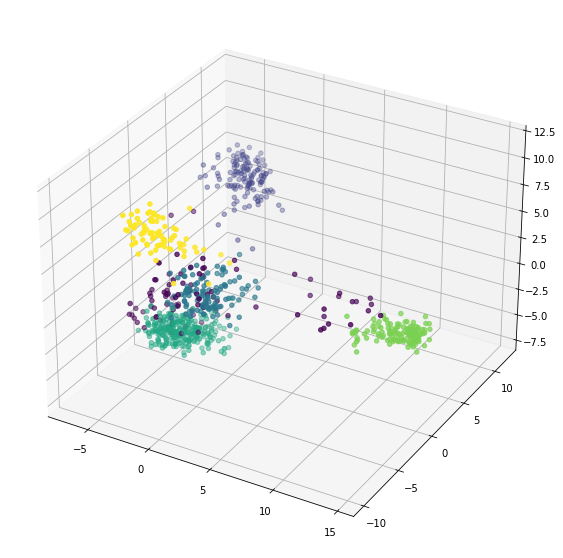

In [ ]:
import collections
from sklearn import metrics
from sklearn.metrics.cluster import homogeneity_score, v_measure_score
eps = 10
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples = min_samples)
dbscan.fit(components)
predictions = dbscan.fit_predict(components)

print(f"Accuracy: {round(collections.Counter(predictions == newlabels)[1]*100/len(newlabels),2)}")
#print(f"Silhouette score: {metrics.silhouette_score(components, predictions, metric='euclidean')}")
print(f"Homogeneity score: {homogeneity_score(newlabels, predictions)}")
print(f"V-score: {metrics.v_measure_score(newlabels, predictions)}")
fig = plt.figure(figsize = (10,10) )
ax = plt.axes(projection='3d')
x = components[:, 0]
y = components[:, 1]
z = components[:, 2]
ax.scatter3D(x, y, z, c=predictions);


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f98e27f7-6444-4cf3-8fec-73bc47540f9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>